# Software Defect Prediction using SMOTE based Neural Network

## Reproducible

In [1]:
def repro():
  # Seed value
  # Apparently you may use different seed values at each stage
  seed_value= 42

  # 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
  import os
  os.environ['PYTHONHASHSEED']=str(seed_value)

  # 2. Set the `python` built-in pseudo-random generator at a fixed value
  import random
  random.seed(seed_value)

  # 3. Set the `numpy` pseudo-random generator at a fixed value
  import numpy as np
  np.random.seed(seed_value)

  # 4. Set the `tensorflow` pseudo-random generator at a fixed value
  import tensorflow as tf
  tf.random.set_seed(seed_value)
  # for later versions: 
  # tf.compat.v1.set_random_seed(seed_value)

  # 5. Configure a new global `tensorflow` session
  from keras import backend as K
  # session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
  # sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
  # K.set_session(sess)
  # for later versions:
  session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
  sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
  tf.compat.v1.keras.backend.set_session(sess)
repro()

Using TensorFlow backend.


In [2]:
repro()

## Import

In [3]:
import pandas as pd
import numpy as np

from sklearn.metrics import confusion_matrix    #Confussion Matrix
from sklearn import metrics                     #Evaluation Measurment\
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from tensorflow.keras.models import Sequential       
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import optimizers
from keras.wrappers.scikit_learn import KerasClassifier
import keras
# from tensorflow.keras import optimizers

import math

from scipy.stats import uniform

import matplotlib.pyplot as plt                 #Visualisasi

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

modelrf=RandomForestClassifier(random_state=42)
modelnb = GaussianNB()
modellogreg = LogisticRegression()
modeldt = DecisionTreeClassifier()
modelsvm = SVC()

import tensorflow as tf

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore')
from IPython.display import display


## Load Dataset

,Dataset,Data,Feature
0,CM1,498,22
1,JM1,10880,22
2,MW1,253,38
3,KC1,2109,22
4,KC2,522,22
5,PC1,1109,22
6,PC2,745,37
7,PC3,1077,38
8,PC4,1458,38


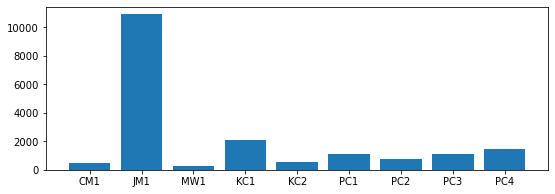

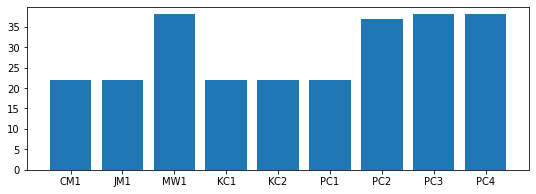

In [4]:
repro()
#Import CM1 Dataset
data_cm1 = pd.read_csv('Dataset/clean/CM1.csv')

#import + Preprocess JM1 Dataset
data_jm1 = pd.read_csv('Dataset/clean/JM1.csv')
indexNames = data_jm1[ data_jm1['branchCount'] == '?' ].index
data_jm1.drop(indexNames , inplace=True)

#import MW1 Dataset
data_mw1 = pd.read_csv('Dataset/clean/MW1.csv')

#import KC1 Dataset
data_kc1 = pd.read_csv('Dataset/clean/KC1.csv')

#import KC2 Dataset ------------------
data_kc2 = pd.read_csv('Dataset/clean/KC2.csv')

#import PC1 Dataset
data_pc1 = pd.read_csv('Dataset/clean/PC1.csv')

#import PC2 Dataset -------------
data_pc2 = pd.read_csv('Dataset/clean/PC2.csv')

#import PC3 Dataset ----------------
data_pc3 = pd.read_csv('Dataset/clean/PC3.csv')

#import PC4 Dataset
data_pc4 = pd.read_csv('Dataset/clean/PC4.csv')


#Visualisasi Jumlah Data
names = ['CM1', 'JM1', 'MW1', 'KC1', 'KC2', 'PC1', 'PC2', 'PC3', 'PC4']
values_data = [data_cm1.shape[0], data_jm1.shape[0], data_mw1.shape[0],data_kc1.shape[0],data_kc2.shape[0],
          data_pc1.shape[0],data_pc2.shape[0],data_pc3.shape[0],data_pc4.shape[0]]
plt.figure(figsize=(9, 3))
plt.bar(names, values_data)

#Visualisasi Jumlah Fitur
values_feature = [data_cm1.shape[1], data_jm1.shape[1], data_mw1.shape[1],data_kc1.shape[1],data_kc2.shape[1],
          data_pc1.shape[1],data_pc2.shape[1],data_pc3.shape[1],data_pc4.shape[1]]
plt.figure(figsize=(9, 3))
plt.bar(names, values_feature)

# data_pc4.iloc[:, data_pc4.columns != 'c'] = scaler.fit_transform(data_pc4.iloc[:, data_pc4.columns != 'c'])
# data_pc3.iloc[:, data_pc3.columns != 'Defective'] = scaler.fit_transform(data_pc3.iloc[:, data_pc3.columns != 'Defective'])

Dataset = {'Dataset': ['CM1', 'JM1', 'MW1', 'KC1', 'KC2', 'PC1', 'PC2', 'PC3', 'PC4'],
           'Data': [data_cm1.shape[0], data_jm1.shape[0], data_mw1.shape[0],data_kc1.shape[0],data_kc2.shape[0],
                    data_pc1.shape[0],data_pc2.shape[0],data_pc3.shape[0],data_pc4.shape[0]],
           'Feature': [data_cm1.shape[1], data_jm1.shape[1], data_mw1.shape[1],data_kc1.shape[1],data_kc2.shape[1],
                       data_pc1.shape[1],data_pc2.shape[1],data_pc3.shape[1],data_pc4.shape[1]]
        }

df = pd.DataFrame(Dataset, columns = ['Dataset', 'Data','Feature'])
df

## Min-Max Scaller

In [5]:
repro()
scaler = MinMaxScaler()

data_cm1.iloc[:, data_cm1.columns != 'class'] = scaler.fit_transform(data_cm1.iloc[:, data_cm1.columns != 'class'])
data_jm1.iloc[:, data_jm1.columns != 'defects'] = scaler.fit_transform(data_jm1.iloc[:, data_jm1.columns != 'defects'])
data_kc1.iloc[:, data_kc1.columns != 'class'] = scaler.fit_transform(data_kc1.iloc[:, data_kc1.columns != 'class'])
data_kc2.iloc[:, data_kc2.columns != 'class'] = scaler.fit_transform(data_kc2.iloc[:, data_kc2.columns != 'class'])
data_pc1.iloc[:, data_pc1.columns != 'class'] = scaler.fit_transform(data_pc1.iloc[:, data_pc1.columns != 'class'])
data_pc2.iloc[:, data_pc2.columns != 'Defective'] = scaler.fit_transform(data_pc2.iloc[:, data_pc2.columns != 'Defective'])
data_pc3.iloc[:, data_pc3.columns != 'Defective'] = scaler.fit_transform(data_pc3.iloc[:, data_pc3.columns != 'Defective'])
data_pc4.iloc[:, data_pc4.columns != 'c'] = scaler.fit_transform(data_pc4.iloc[:, data_pc4.columns != 'c'])

## Evaluation Metric

In [6]:
def bal(y_true, Y_pred):
    repro()
    tn, fp, fn, tp = confusion_matrix(y_true, Y_pred, labels=[0,1]).ravel()
    pf = fp/(fp+tn)
    bal = 1 - ((math.sqrt((1-recall(y_true, Y_pred))**2+ pf**2))/(math.sqrt(2)))
    return bal

def auc(y_true, Y_pred):
    repro()
    # fpr, tpr, thresholds = metrics.roc_curve(y_test, Y_pred, pos_label=True)
    auc = metrics.roc_auc_score(y_true, Y_pred)
    return auc

def gmeans(y_true, Y_pred):
    # repro()
    tn, fp, fn, tp = confusion_matrix(y_true, Y_pred, labels=[0,1]).ravel()
    pf = fp/(fp+tn)
    pd = tp/(tp+fn)
    gmeans = math.sqrt(pd*(1-pf))
    return gmeans

def pf(y_true, Y_pred):
    repro()
    tn, fp, fn, tp = confusion_matrix(y_true, Y_pred, labels=[0,1]).ravel()
    # print(tn)
    pf = fp/(fp+tn)
    return pf

def recall(y_true, Y_pred):
  repro()
  tn, fp, fn, tp = confusion_matrix(y_true, Y_pred, labels=[0,1]).ravel()
  pd = tp/(tp+fn)
  return pd

## KNN

In [8]:
def search_DT(data, 
              y_name, 
              fold,
              smote = True):

  X = data.iloc[:, data.columns != y_name ]
  y = data[y_name]

  kfold_inner = StratifiedKFold(n_splits=fold, shuffle=True, random_state=42)
  kfold_outer = StratifiedKFold(n_splits=fold, shuffle=True, random_state=42)
  sm = SMOTE(random_state=42)

  model = KNeighborsClassifier()
    
#, max_depth=depth, n_estimators=estimator
  scoring = {'recall': metrics.make_scorer(recall), 
             'bal': metrics.make_scorer(bal), 
             'auc':metrics.make_scorer(metrics.roc_auc_score), 
             'gmeans':metrics.make_scorer(gmeans)}

  
  if (smote == True):
    pipeline = Pipeline([('sm', sm), ('clf', model)])
    distributions = dict(clf__leaf_size = [ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 100],
                         clf__n_neighbors = [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
                         sm__k_neighbors = [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
                         sm__sampling_strategy = [0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 ,
                                                  0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])
#   else:
#     pipeline = Pipeline([('clf', model)])
#     distributions = dict(clf__max_depth = np.arange(5,10,1))
    
  clf = RandomizedSearchCV(pipeline, distributions, random_state=42, cv=kfold_inner, scoring = scoring, refit = 'bal', n_jobs = -1, n_iter=50, verbose = 1)
  result = cross_validate(clf, X=X, y=y, cv=kfold_outer, scoring=scoring)
  print('bal: ', result['test_bal'].mean())
  print('recall: ', result['test_recall'].mean())
  print('auc: ', result['test_auc'].mean())
  print('gmeans: ', result['test_gmeans'].mean())

### KC1

In [9]:
repro()
search_rf_kc1 = search_DT(data_kc1, 'class', 5, smote=True)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   53.0s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.1min finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   40.4s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   54.2s finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   39.9s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   53.5s finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   41.8s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   57.6s finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   46.0s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   59.9s finished


bal:  0.7075084373908205
recall:  0.7238228438228439
auc:  0.7110419730082652
gmeans:  0.7097582531263477


### KC2

In [10]:
repro()
search_kc2 = search_DT(data_kc2, 'class', 5, smote=True)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   41.8s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   56.2s finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   43.7s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   57.8s finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   41.4s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   55.2s finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   39.6s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   52.2s finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   37.3s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   49.8s finished


bal:  0.7568941854460896
recall:  0.7471861471861472
auc:  0.766364157930423
gmeans:  0.7622432689566717


### PC1

In [11]:
repro()
search_pc1 = search_DT(data_pc1, 'class', 5, smote=True)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   38.7s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   51.2s finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   40.2s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   54.1s finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   41.5s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   59.7s finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.9min finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.7min finished


bal:  0.7736206371976065
recall:  0.7925
auc:  0.7794871839969983
gmeans:  0.7778489787011824


### PC3

In [12]:
repro()
search_pc3 = search_DT(data_pc3, 'Defective', 5, smote=True)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.6min finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.6min finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.5min finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.7min finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.8min finished


bal:  0.7324845009703858
recall:  0.7227920227920228
auc:  0.7352308644861836
gmeans:  0.7339019054667718


### PC4

In [13]:

repro()
search_pc4 = search_DT(data_pc4, 'c', 5, smote=True)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.7min finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.8min finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.7min finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.8min finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.7min finished


bal:  0.7810912967921397
recall:  0.7923809523809524
auc:  0.7848623511904762
gmeans:  0.7837881576114641


### JM1

In [18]:
repro()
search_jm1 = search_DT(data_jm1, 'defects', 5, smote=True)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.5min finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.7min finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.6min finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.6min finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.5min finished


bal:  0.6511349355186618
recall:  0.6352901255514081
auc:  0.6532389078911892
gmeans:  0.6520832901187115
